# 線性回歸

&emsp;&emsp;線性回歸用於擬合線性數據，並對新數據的標記作出預測。

## 找一個超平面 | 模型

&emsp;&emsp;假設有某個數據集$\boldsymbol D_1 = \{(x^{(i)}, y^{(i)})\}^m_{i=1}$，其中$x^{(i)}$只有一個屬性，是一個實數。以$x^{(i)}$為橫軸，$y^{(i)}$為縱軸可視化如圖

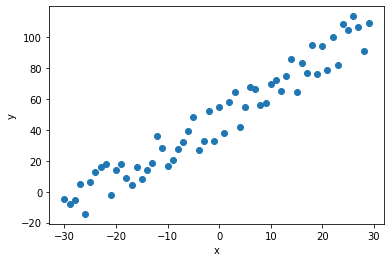

In [21]:
import matplotlib.pyplot as plt
import random

plt.scatter([i for i in range(-30, 30)], [2 * i + 33 + random.random() * 30 for i in range(-30, 30)])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

&emsp;&emsp;可以看出，數據集$\boldsymbol D_1$的數據樣本$x^{(i)}$可視化之後分布在一條直線附近，即線性分布的。因此，可用一條直線擬合數據
$$
{\hat y}^{(i)} = w \cdot x^{(i)} + b \tag{1}
$$

&emsp;&emsp;這就是樣例$x^{(i)}$只有一個屬性時的數據集的線性回歸模型。

&emsp;&emsp;假設有另一個數據集$\boldsymbol D_2 = \{({\boldsymbol x}^{(i)}, y^{(i)})\}^m_{i=1}$，其中${\boldsymbol x}^{(i)} = \{x^{(i)}_1, x^{(i)}_2, \cdots, x^{(i)}_n\}$有多個屬性，是一個向量。以${\boldsymbol x}^{(i)}$為橫軸，$y^{(i)}$為縱軸可視化如圖

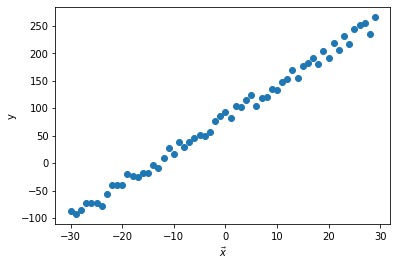

In [34]:
plt.scatter([i for i in range(-30, 30)], [6 * i + 66 + random.random() * 30 for i in range(-30, 30)])
plt.xlabel(r"$\vec x$")
plt.ylabel("y")
plt.show()

&emsp;&emsp;可以看出，數據集$\boldsymbol D_2$的數據樣本${\boldsymbol x}^{(i)}$可視化之後分布在一條直線附近，即線性分布的。因此，可用一條“直線”擬合數據
$$
{\hat y}^{(i)} = {\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b \tag{2}
$$

&emsp;&emsp;這就是樣例${\boldsymbol x}^{(i)}$有多個屬性時的數據集的線性回歸模型。圖2是以向量${\boldsymbol x}^{(i)}$為橫軸可視化的。嚴格來說，公式(2)代表一個超平面，這個超平面的法向量是$\boldsymbol w$。實際上，公式(1)是公式(2)在${\boldsymbol x}^{(i)}$只有一個屬性時的情形。公式(2)是線性回歸模型的一般形式。

## 評判標準 | Loss Function & Cost Function

&emsp;&emsp;線性回歸常以平方差作為損失函數
$$
L^{(i)} = ({\hat y}^{(i)} - y^{(i)})^2 \tag{3}
$$

&emsp;&emsp;因此代價函數為
$$
\begin{align}
J 
&= \sum^m_{i=1} L^{(i)} \tag{4.1} \\
&= \sum^m_{i=1} ({\hat y}^{(i)} - y^{(i)})^2 \tag{4.2}
\end{align}
$$

## &emsp;&emsp;優化 | Optimization

&emsp;&emsp;可用批梯度下降優化線性回歸模型。
$$
\begin{align}
\boldsymbol w &:= \boldsymbol w - \nabla_{\boldsymbol w} J \tag{5.1} \\
b &:= b - \nabla_b J \tag{5.2}
\end{align}
$$

&emsp;&emsp;$\nabla_{\boldsymbol w} J$，$\nabla_b J$計算見例1。

「例1」求$\nabla_{\boldsymbol w} J$，$\nabla_b J$  
解：  
$$
\begin{align}
\nabla_{\boldsymbol w} J
&= \frac{\partial J}{\partial \boldsymbol w} \\
&= \frac{\partial \sum^m_{i=1} ({\hat y}^{(i)} - y^{(i)})^2}{\partial \boldsymbol w} \\
&= \frac{\partial \sum^m_{i=1} ({\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b - y^{(i)})^2}{\partial \boldsymbol w} \\
&= \sum^m_{i=1} 2({\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b - y^{(i)}) {\boldsymbol x}^{(i)} \\
&= \sum^m_{i=1} 2({\hat y}^{(i)} - y^{(i)}) {\boldsymbol x}^{(i)} \\
&= 2 \sum^m_{i=1} ({\hat y}^{(i)} - y^{(i)}) {\boldsymbol x}^{(i)} \\
\\
\nabla_{\boldsymbol b} J
&= \frac{\partial J}{\partial \boldsymbol b} \\
&= \frac{\partial \sum^m_{i=1} ({\hat y}^{(i)} - y^{(i)})^2}{\partial \boldsymbol b} \\
&= \frac{\partial \sum^m_{i=1} ({\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b - y^{(i)})^2}{\partial \boldsymbol b} \\
&= \sum^m_{i=1} 2({\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b - y^{(i)}) \\
&= \sum^m_{i=1} 2({\hat y}^{(i)} - y^{(i)}) \\
&= 2 \sum^m_{i=1} ({\hat y}^{(i)} - y^{(i)}) \\
\end{align}
$$